# Pima Indian Diabetes Prediction

Import some basic libraries.
* Pandas - provided data frames
* matplotlib.pyplot - plotting support

Use Magic %matplotlib to display graphics inline instead of in a popup window.


In [1]:
import pandas as pd                 # pandas is a dataframe library
import matplotlib.pyplot as plt      # matplotlib.pyplot plots data

%matplotlib inline

## Loading and Reviewing the Data

In [140]:
df = pd.read_csv("./data/pima-data.csv")

In [146]:
df = pd.read_csv("./data/flag.csv")

In [147]:
df.shape

(194, 30)

In [148]:
df.head(5)

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [151]:
df.tail(5)

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
189,Western-Samoa,6,3,3,0,1,1,0,0,3,...,0,1,5,0,0,0,0,0,blue,red
190,Yugoslavia,3,1,256,22,6,6,0,3,4,...,0,0,1,0,0,0,0,0,blue,red
191,Zaire,4,2,905,28,10,5,0,0,4,...,0,0,0,0,0,1,1,0,green,green
192,Zambia,4,2,753,6,10,5,3,0,4,...,0,0,0,0,0,0,1,0,green,brown
193,Zimbabwe,4,2,391,8,10,5,0,7,5,...,0,0,1,0,1,1,1,0,green,green


### Definition of features
From the metadata on the data source we have the following definition of the features.

| Feature  | Description | Comments |
|--------------|-------------|--------|
| num_preg     | number of pregnancies         |
| glucose_conc | Plasma glucose concentration a 2 hours in an oral glucose tolerance test         |
| diastolic_bp | Diastolic blood pressure (mm Hg) |
| thickness | Triceps skin fold thickness (mm) |
|insulin | 2-Hour serum insulin (mu U/ml) |
| bmi |  Body mass index (weight in kg/(height in m)^2) |
| diab_pred |  Diabetes pedigree function |
| Age (years) | Age (years)|
| skin | ???? | What is this? |
| diabetes | Class variable (1=True, 0=False) |  Why is our data boolean (True/False)? |


## Check for null values

In [152]:
df.isnull().values.any()


False

### Correlated Feature Check

Helper function that displays correlation by color.  Red is most correlated, Blue least.

In [153]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks


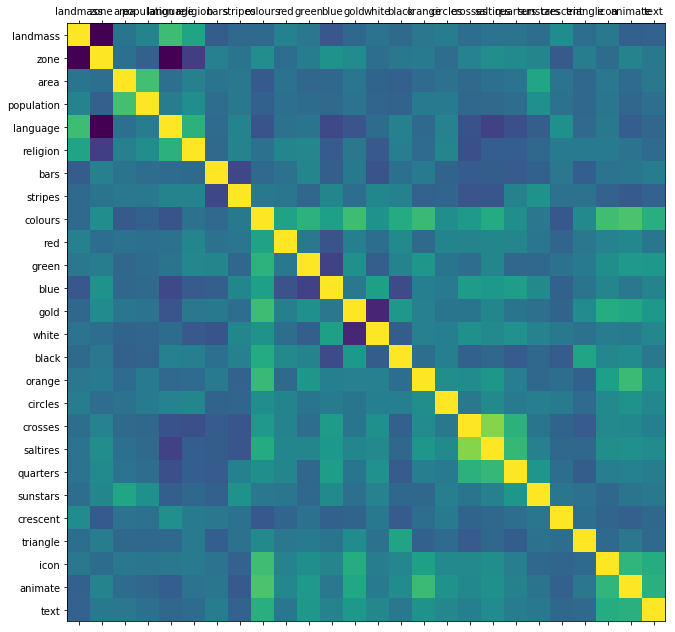

In [154]:
plot_corr(df)

In [155]:
df.corr()

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
landmass,1.000000,-0.615759,0.013279,0.105940,0.496400,0.325073,-0.139290,-0.063375,-0.062856,0.093400,...,0.065696,-0.031103,-0.003429,-0.004537,-0.034843,0.168438,-0.033154,0.030359,-0.118856,-0.110743
zone,-0.615759,1.000000,-0.025431,-0.124111,-0.618387,-0.320537,0.085446,0.002359,0.173567,-0.032269,...,-0.042542,0.101441,0.179667,0.153300,0.121754,-0.159272,0.060416,-0.048692,0.106034,0.037602
area,0.013279,-0.025431,1.000000,0.519030,-0.027869,0.087941,0.001243,0.028454,-0.162227,-0.005470,...,-0.005652,-0.057888,-0.025492,-0.001968,0.340572,-0.005049,-0.075366,0.026593,-0.051539,0.024423
population,0.105940,-0.124111,0.519030,1.000000,0.062804,0.172731,-0.041392,0.030100,-0.115052,-0.024648,...,0.051257,-0.076305,-0.059061,-0.041349,0.191377,-0.015544,-0.078156,0.017966,-0.082259,-0.025194
language,0.496400,-0.618387,-0.027869,0.062804,1.000000,0.422315,-0.049862,0.105409,-0.197883,-0.011048,...,0.098476,-0.210966,-0.296106,-0.220535,-0.126241,0.193375,-0.064845,0.028336,-0.133756,-0.082977
religion,0.325073,-0.320537,0.087941,0.172731,0.422315,1.000000,-0.060000,0.103222,-0.017720,0.121721,...,0.123260,-0.225238,-0.133373,-0.135713,-0.075081,0.053145,0.056868,0.055714,-0.002741,-0.055158
bars,-0.139290,0.085446,0.001243,-0.041392,-0.049862,-0.060000,1.000000,-0.273371,-0.064574,-0.017093,...,-0.096650,-0.144432,-0.140070,-0.150604,-0.114667,0.021743,-0.132973,-0.002598,0.016260,0.067709
stripes,-0.063375,0.002359,0.028454,0.030100,0.105409,0.103222,-0.273371,1.000000,0.038278,0.014210,...,-0.087479,-0.190550,-0.190735,0.091941,0.215486,-0.010242,-0.005719,-0.107426,-0.157922,-0.111564
colours,-0.062856,0.173567,-0.162227,-0.115052,-0.197883,-0.017720,-0.064574,0.038278,1.000000,0.311759,...,0.178062,0.253827,0.378810,0.187861,0.031008,-0.173644,0.143252,0.505614,0.544576,0.398483
red,0.093400,-0.032269,-0.005470,-0.024648,-0.011048,0.121721,-0.017093,0.014210,0.311759,1.000000,...,0.108639,0.102772,0.122031,0.119914,0.019726,-0.091458,0.025760,0.097513,0.133648,0.017507


In [159]:
df.head(5)

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


The skin and thickness columns are correlated 1 to 1.  Dropping the skin column

In [196]:
del df['botright']

In [197]:
df.head(5)

,name,landmass,zone,area,population,language,religion
0,Afghanistan,5,1,648,16,10,2
1,Albania,3,1,29,3,6,6
2,Algeria,4,1,2388,20,8,2
3,American-Samoa,6,3,0,0,1,1
4,Andorra,3,1,0,0,6,0


Check for additional correlations

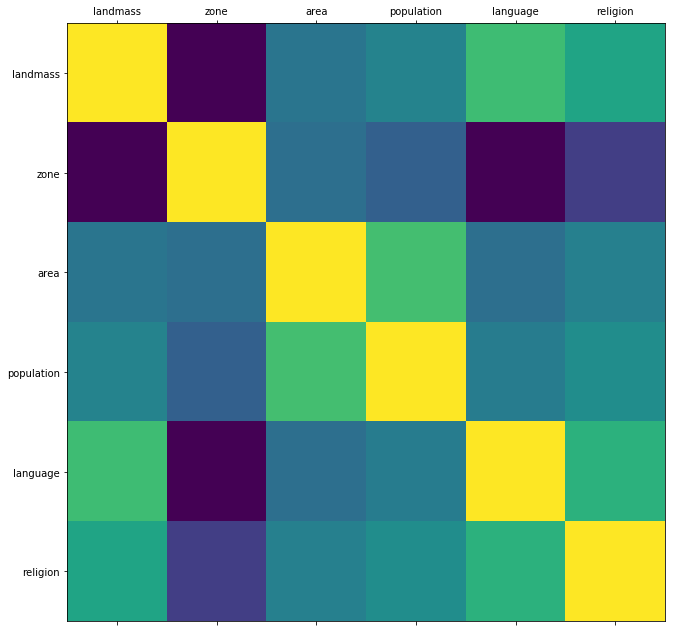

In [198]:
plot_corr(df)

The correlations look good.  There appear to be no coorelated columns.

## Mold Data

### Data Types

Inspect data types to see if there are any issues.  Data should be numeric.

In [240]:
df.head(5)

,name,landmass,zone,area,population,language,religion
0,Afghanistan,5,1,648,16,10,2
1,Albania,3,1,29,3,6,6
2,Algeria,4,1,2388,20,8,2
3,American-Samoa,6,3,0,0,1,1
4,Andorra,3,1,0,0,6,0


Change diabetes from boolean to integer, True=1, False=0

In [68]:
diabetes_map = {True : 1, False : 0}
df['diabetes'] = df['diabetes'].map(diabetes_map)

Verify that the diabetes data type has been changed.

In [164]:
df.head(5)

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


### Check for null values

In [165]:
df.isnull().values.any()

False

No obvious null values.

### Check class distribution 

Rare events are hard to predict

In [71]:
num_obs = len(df)
num_true = len(df.loc[df['diabetes'] == 1])
num_false = len(df.loc[df['diabetes'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)


Good distribution of true and false cases.  No special work needed.

### Spliting the data 

70% for training, 30% for testing

In [241]:
from sklearn.cross_validation import train_test_split

feature_col_names = ['landmass', 'area', 'population', 'language']
predicted_class_names = ['religion']

X = df[feature_col_names].values     # predictor feature columns (8 X m)
y = df[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 
                            # test_size = 0.3 is 30%, 42 is the answer to everything

We check to ensure we have the the desired 70% train, 30% test split of the data

In [242]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

69.59% in training set
30.41% in test set


#### Verifying predicted value was split correctly

In [244]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))


### Post-split Data Preparation

#### Hidden Missing Values

In [245]:
df.head()

,name,landmass,zone,area,population,language,religion
0,Afghanistan,5,1,648,16,10,2
1,Albania,3,1,29,3,6,6
2,Algeria,4,1,2388,20,8,2
3,American-Samoa,6,3,0,0,1,1
4,Andorra,3,1,0,0,6,0


Are these 0 values possible?

How many rows have have unexpected 0 values?

In [25]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# rows missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(df.loc[df['age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


#### Impute with the mean

In [246]:
from sklearn.preprocessing import Imputer

#Impute with mean all 0 readings
fill_0 = Imputer(missing_values=0, strategy="mean", axis=0)

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

## Training Initial Algorithm - Naive Bayes

In [247]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

### Performance on Training Data

In [248]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.4815



### Performance on Testing Data

In [249]:
# predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))


Accuracy: 0.3559


#### Metrics

In [250]:
print("Confusion Matrix")
# Note the use of labels for set 1=True to upper left and 0=False to lower right
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test, labels=[1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test, labels=[1,0]))


Confusion Matrix
[[ 3 11]
 [ 1  9]]

Classification Report
             precision    recall  f1-score   support

          1       0.75      0.14      0.23        22
          0       0.38      0.82      0.51        11

avg / total       0.62      0.36      0.33        33



## Random Forest

In [268]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)      # Create random forest object
rf_model.fit(X_train, y_train.ravel()) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### Predict Training Data

In [272]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9704


### Predict Test Data

In [273]:
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.5593


In [274]:
print(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1, 0]) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test, labels=[1,0]))

[[12  8]
 [ 1  9]]

Classification Report
             precision    recall  f1-score   support

          1       0.71      0.55      0.62        22
          0       0.50      0.82      0.62        11

avg / total       0.64      0.64      0.62        33



## Logistic Regression

In [263]:
from sklearn.linear_model import LogisticRegression

lr_model =LogisticRegression(C=0.7, random_state=123)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1, 0]) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test, labels=[1,0]))

Accuracy: 0.3559
[[12  3]
 [ 7  3]]

Classification Report
             precision    recall  f1-score   support

          1       0.44      0.55      0.49        22
          0       0.43      0.27      0.33        11

avg / total       0.44      0.45      0.44        33



Setting regularization parameter

In [264]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")



ValueError: Target is multiclass but average='binary'. Please choose another average setting.

### Logisitic regression with class_weight='balanced'

In [265]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")



ValueError: Target is multiclass but average='binary'. Please choose another average setting.

In [214]:
from sklearn.linear_model import LogisticRegression
lr_model =LogisticRegression( class_weight="balanced", C=best_score_C_val, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1, 0]) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test, labels=[1,0]))
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: 0.2881
[[10  3]
 [ 5  2]]

Classification Report
             precision    recall  f1-score   support

          1       0.53      0.45      0.49        22
          0       0.33      0.18      0.24        11

avg / total       0.46      0.36      0.40        33



ValueError: Target is multiclass but average='binary'. Please choose another average setting.

### LogisticRegressionCV

In [266]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=5, refit=False, class_weight="balanced")  # set number of jobs to -1 which uses all cores to parallelize
lr_cv_model.fit(X_train, y_train.ravel())

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


LogisticRegressionCV(Cs=3, class_weight='balanced', cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=False, scoring=None, solver='lbfgs', tol=0.0001,
           verbose=0)

### Predict on Test data

In [267]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test, labels=[1, 0]) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test, labels=[1,0]))

Accuracy: 0.2712
[[11  1]
 [ 5  1]]

Classification Report
             precision    recall  f1-score   support

          1       0.55      0.50      0.52        22
          0       0.33      0.09      0.14        11

avg / total       0.48      0.36      0.40        33

